In [ ]:
# Connectiong to google drive
from google.colab import drive
drive.mount('/content/drive')

# importing library
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pick an color image of your choice and do the following.
1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.



The shape of image is (256, 256, 3)


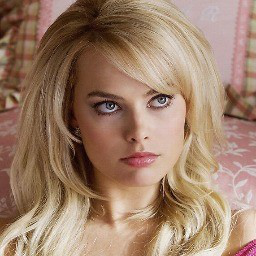

In [ ]:
#Ioading the image from drive
img = Image.open("/content/drive/MyDrive/Assignment2.jpg")
im = np.array(img)
print(f"The shape of image is {im.shape}")
# Displying original image
img

2. For the simplicity, convert the image into gray scale i.e. black and white.

The shape of grayscale image is (256, 256)


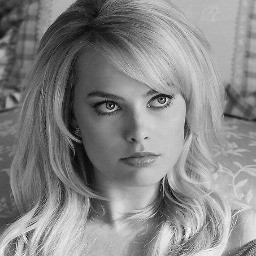

In [ ]:
#Converting the image to gray scale
grayImage = img.convert("L")

#Get the image data as a Numpy array
imageData = np.array(grayImage)
print(f"The shape of grayscale image is {imageData.shape}")

# Displaying the grayscale image
grayImage

5.2 Standardize/Scale the data:

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:

In [ ]:
#Standarize the data by subtracting the mean and dividing by the standard deviation
Mean = np.mean(imageData, axis =0)
Std = np.std(imageData, axis =0)
standardizedData = (imageData-Mean)/Std
print(standardizedData)

[[-0.6096611  -0.72280517 -0.83345932 ... -0.2027648  -0.10831735
  -0.02013681]
 [-0.72523667 -0.88503799 -1.067927   ...  0.0206146   0.21505573
   0.40068142]
 [-1.02573314 -1.11679917 -1.2086076  ... -0.00730782  0.26895124
   0.47958483]
 ...
 [ 2.95006629  2.96219753  2.58976876 ... -0.48198906 -1.07843659
  -0.23054592]
 [ 2.99629651  2.63773188  2.54287523 ... -1.45927398 -1.02454108
   0.24287458]
 [ 2.69580005  2.89266918  2.40219462 ...  1.24920135 -1.21317538
  -0.75656871]]


5.3 Calculate Covariance Matrix:

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix

In [ ]:
#Calculate the covariance matrix
mean_vec = np.mean(standardizedData, axis=0)
# Formula for covariance matrix
covariance_matrix = (standardizedData - mean_vec).T.dot((standardizedData - mean_vec)) / (standardizedData.shape[0]-1)
print('Covariance matrix \n%s' %covariance_matrix)

Covariance matrix 
[[ 1.00392157  0.97802884  0.94481171 ... -0.18043977 -0.28042459
  -0.22358753]
 [ 0.97802884  1.00392157  0.97354263 ... -0.15763806 -0.26349634
  -0.19763971]
 [ 0.94481171  0.97354263  1.00392157 ... -0.12631329 -0.2296984
  -0.1684862 ]
 ...
 [-0.18043977 -0.15763806 -0.12631329 ...  1.00392157  0.91415697
   0.89666826]
 [-0.28042459 -0.26349634 -0.2296984  ...  0.91415697  1.00392157
   0.96440711]
 [-0.22358753 -0.19763971 -0.1684862  ...  0.89666826  0.96440711
   1.00392157]]


5.4 Eigen Decomposition:

Decompose a covariance matrix into eigen values and eigen vectors:

In [ ]:
# Decompose the covariance matrix into eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print(f"Eigenvalues \n{eigenvalues}")
print(f"Eigenvectors \n{eigenvectors}")

Eigenvalues 
[ 8.23353557e+01  3.64790637e+01  2.27540027e+01  1.42348595e+01
  1.34276492e+01  1.01793413e+01  8.25211073e+00  5.89055217e+00
  4.73922522e+00  4.25814699e+00  3.61446815e+00  2.54504196e+00
  2.10890173e+00  1.97258121e+00  1.85566944e+00  1.75798138e+00
  1.56946077e+00  1.49656462e+00  1.46179246e+00  1.35111020e+00
  1.21469999e+00  1.18106380e+00  1.05294633e+00  1.03308488e+00
  9.38173030e-01  8.87008645e-01  8.84482171e-01  8.34696061e-01
  7.69565039e-01  7.37804742e-01  7.24177938e-01  6.78180830e-01
  6.61339780e-01  6.23830469e-01  5.96475118e-01  5.74907302e-01
  5.81534153e-01  5.53390054e-01  5.32597873e-01  5.06809321e-01
  5.11308370e-01  4.68345239e-01  4.59636701e-01  4.45325660e-01
  4.41979341e-01  4.39007218e-01  4.25879547e-01  4.20304149e-01
  4.00157326e-01  3.93774396e-01  3.80504031e-01  3.65848051e-01
  3.50140903e-01  3.43376885e-01  3.27254864e-01  3.14684909e-01
  3.12187272e-01  3.04021846e-01  2.96141104e-01  2.88959584e-01
  2.73188739

In [ ]:
# Checking unit value in diagonal elements
for ev in eigenvectors:
  np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))
print('everthing ok')

everthing ok


5.5 Identify Principal Components:

Determine the explained variance by each principal components, based on this we can determine how
many principal components to pick from.
• Experiment with Principal Components:
– Pick three different combination of principal components with various explained variance
value and compare the result.

In [ ]:
# Sort the eigenvalues in decreasing order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

 #compute the explained variance
explained_variance = eigenvalues / eigenvalues.sum()
print(f"The explained variance are\n {explained_variance}")

# Experiment with different combinations of principal components
combination_1 = explained_variance[:10]  
combination_2 = explained_variance[:50]  
combination_3 = explained_variance[:100]  

print(combination_1)
print(combination_2)
print(combination_3)

# Define a list of values for n_components
n_components_list = [10, 50, 100]

The explained variance are
 [ 3.20366145e-01  1.41939716e-01  8.85356244e-02  5.53877130e-02
  5.22468652e-02  3.96077274e-02  3.21088903e-02  2.29200867e-02
  1.84402837e-02  1.65684125e-02  1.40638638e-02  9.90273589e-03
  8.20571809e-03  7.67529616e-03  7.22039349e-03  6.84029010e-03
  6.10675805e-03  5.82311980e-03  5.68782160e-03  5.25715791e-03
  4.72638697e-03  4.59550886e-03  4.09700492e-03  4.01972418e-03
  3.65042301e-03  3.45134284e-03  3.44151235e-03  3.24779504e-03
  2.99437080e-03  2.87079177e-03  2.81776999e-03  2.63879565e-03
  2.57326727e-03  2.42731887e-03  2.32087944e-03  2.26274428e-03
  2.23695926e-03  2.15323584e-03  2.07233364e-03  1.98949637e-03
  1.97199061e-03  1.82232721e-03  1.78844236e-03  1.73275823e-03
  1.71973773e-03  1.70817323e-03  1.65709358e-03  1.63539975e-03
  1.55700864e-03  1.53217272e-03  1.48053784e-03  1.42351155e-03
  1.36239518e-03  1.33607644e-03  1.27334580e-03  1.22443621e-03
  1.21471793e-03  1.18294633e-03  1.15228243e-03  1.12433920e-

5.6 Reconstruction of the image:

Reconstruct the image based on number of principal components you picked in step 5.5.
Reconstruct all three images and conclude the result based on your observation. Display the reconstructed
image, experiment with various number of components.

Number of principal components: 10, Explained variance: 0.7881214647741726
(256, 10)


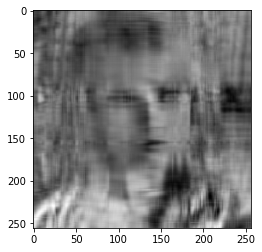

Number of principal components: 50, Explained variance: 0.9426173850738492
(256, 50)


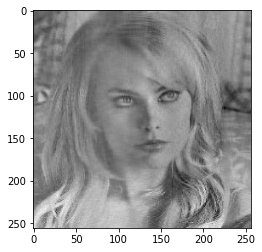

Number of principal components: 100, Explained variance: 0.9836977885877078
(256, 100)


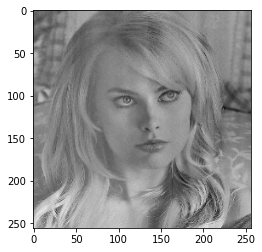

In [ ]:
# Loop through the list of values for n_components
for n_components in n_components_list:
  # Select the top n_components eigenvalues and eigenvectors
  principal_components = eigenvectors[:, :n_components]
  explained_variance_sum = np.sum(explained_variance[:n_components])
  print(f"Number of principal components: {n_components}, Explained variance: {explained_variance_sum}")
  
  print(principal_components.shape)

  # Project the original data onto the principal components
  projected_data = np.dot(standardizedData, principal_components)

  # Reconstruct the image data from the projected data
  reconstructed_data = np.dot(projected_data, principal_components.T)

  # Add the mean of the original data to the reconstructed image
  reconstructed_image = reconstructed_data + np.mean(imageData)

  # Convert the reconstructed data back to an image and display it using matplotlib
  plt.imshow(reconstructed_image, cmap='gray')
  plt.show()

Here in this reconstruction, we have reconstructed three images with three alternative sets of columns: (256, 10), (256, 50), and (256, 100). (256,100). Principal component analysis (PCA) is used in this code to do dimensionality reduction on an image that was imported from Google Drive. The rebuilt image is then displayed for various numbers of principal components. We can see from the graphic above that as the number of primary components rises, so does the quality of the increase and the explained variance. For instance, if the explained variance is 0.33, it means that 33% of the variance in the original data was captured by the first principle components. Additionally, it aids in deciding how many major components to employ for the image reconstruction.